In [1]:
# Import the libraries

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint
from IPython.display import SVG
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [0]:
# Creating function for importing the data. We can also do using keras no need to write function


def get_images(directory):
    Images = []
    Labels = []  # 0 for categori_1 , 1 for categori_2, 2 for categori_3, 3 for categori_4
    label = 0
    
    for labels in os.listdir(directory): # Main Directory where each class label is present as folder name.
        if labels == 'category 1': 
            label = 0
        elif labels == 'category 2':
            label = 1
        elif labels == 'category 3':
            label = 2
        elif labels == 'category 4':
            label = 3
        
        for image_file in os.listdir(directory+labels): # Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) # Reading the image (OpenCV)
            image = cv2.resize(image,(64,64)) # Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) # Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'category 1', 1:'category 2', 2:'category 3', 3:'category 4'}
    
    return labels[class_code]

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
Images, Labels = get_images('/content/gdrive/My Drive/Dataset/Split/Training/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape) 
# (Number of Training Images, Width of image, Height of image, Channel of image)

Shape of Images: (353, 64, 64, 3)
Shape of Labels: (353,)


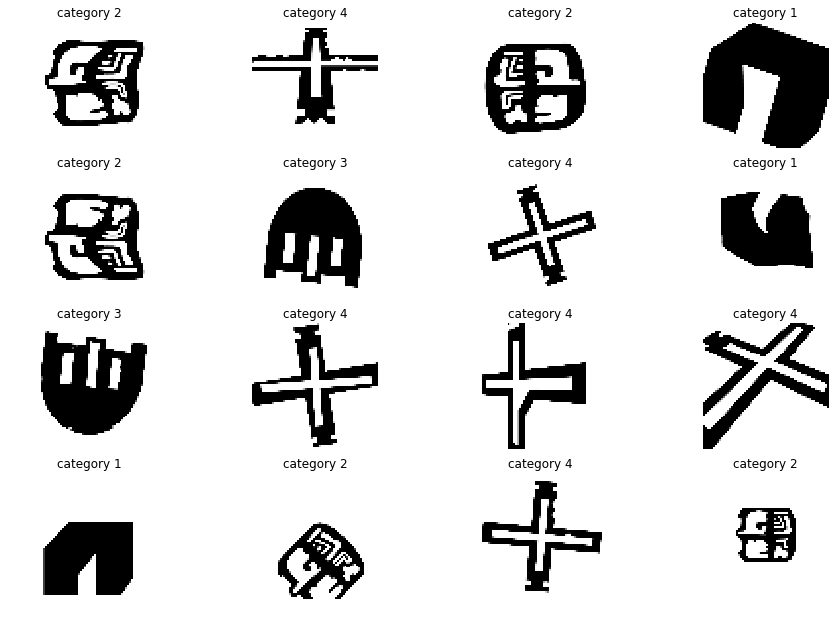

In [6]:
f,ax = plot.subplots(4,4) 
f.subplots_adjust(0,0,2,2)
for i in range(0,4,1):
    for j in range(0,4,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [7]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 4, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
____________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=4)`


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Image Data Generator

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/Split/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/Split/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 353 images belonging to 4 classes.
Found 88 images belonging to 4 classes.


In [9]:
# Now, lets train the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

classifier.fit_generator(training_set,
                         samples_per_epoch = 353,
                         nb_epoch = 15,
                         validation_data = test_set,
                         nb_val_samples = 88)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=11, epochs=15, validation_steps=88)`
  





Epoch 1/15





11/11 [==============================] - 67s 6s/step - loss: 0.4908 - acc: 0.7393 - val_loss: 0.3817 - val_acc: 0.8237
Epoch 2/15
11/11 [==============================] - 37s 3s/step - loss: 0.3378 - acc: 0.8481 - val_loss: 0.3202 - val_acc: 0.8581
Epoch 3/15
11/11 [==============================] - 36s 3s/step - loss: 0.2268 - acc: 0.9084 - val_loss: 0.2739 - val_acc: 0.8978
Epoch 4/15
11/11 [==============================] - 36s 3s/step - loss: 0.1543 - acc: 0.9434 - val_loss: 0.2234 - val_acc: 0.9208
Epoch 5/15
11/11 [==============================] - 36s 3s/step - loss: 0.1069 - acc: 0.9606 - val_loss: 0.1885 - val_acc: 0.9206
Epoch 6/15
11/11 [==============================] - 36s 3s/step - loss: 0.0922 - acc: 0.9606 - val_loss: 0.1756 - val_acc: 0.9400
Epoch 7/15
11/11 [==============================] - 36s 3s/step - loss: 0.0694 - acc: 0.9754 - val_loss: 0.1507 - val_acc: 0.9489
Epoch 8/15
11/11 [==============================] - 36s 3s/step - loss: 0.0623 - a

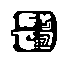

In [10]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/Dataset/test/6052.png', target_size = (64,64,3))
test_image

In [11]:
# Converting image to array n expanding the dimention 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [12]:
# showing one on predicted label
result = classifier.predict(test_image)
result

array([[0., 1., 0., 0.]], dtype=float32)

In [13]:
def prediction (result):
    if result[0][0]==1:
        return 'category 1'
    elif result[0][1] == 1:
        return 'category 2'
    elif result[0][2] == 1:
        return'category 3'
    else:
        return 'category 4'

prediction(result)

'category 2'

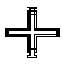

In [14]:
test_image = image.load_img('/content/gdrive/My Drive/Dataset/test/Test_original_C053.png_84d8e7c9-490f-4579-b9a9-501a8ca02cfe.png', target_size = (64,64,3))
test_image

In [15]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
result

def prediction (result):
    if result[0][0]==1:
        return 'category 1'
    elif result[0][1] == 1:
        return 'category 2'
    elif result[0][2] == 1:
        return'category 3'
    else:
        return 'category 4'

prediction(result)

'category 4'